In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

Question 2

In [2]:
#Test strong convergence of Euler method for solving stochastic ODEs

#test probelm: dS =  r*S dt + sig*S dW
#exact solution: S(1) = S(0)*exp((lambda-0.5*sig^2)+sig*W(1))

#parameters:
r   = 0.05; 
sig = 0.5; 
T   = 1; 
S0  = 100;

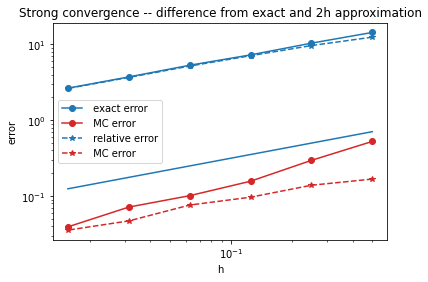

In [52]:
#Monte Carlo simulation comparing to 2h simulation

M = 10**5 #total number of Monte Carlo paths
M2 = 10**4 #number of paths at a time
hh = []
err1 = []
err2 = []
err3 = []
err4 = []

# running the code for different values of h
for p in range(1,7):
    N = 2**p
    h = T/N
    
    sum1 = 0
    sum2 = 0
    sum3 = 0
    sum4 = 0
    
    m = 1
    while m<=M:
        m2 = min(M2,M-m+1)
        m2 = int(m2)
        S = S0*np.ones((1, m2)) #inintial value for all the paths
        S2 = S0*np.ones((1, m2)) #inintial value for all the paths
        W = 0
        
        # repeatedly we move by dW steps taken from normal distribution
        for n in range(1,int(N/2)+1):
            dW1 = math.sqrt(h)*np.random.randn(1,m2)
            S  = np.multiply(S,(1+r*h+sig*dW1))
            
            dW2 = math.sqrt(h)*np.random.randn(1,m2)
            S  = np.multiply(S,(1+r*h+sig*dW2))
            
            #moving by two steps at the time
            S2 = np.multiply(S2,(1+r*2*h+sig*(dW1+dW2)))

            W = W + dW1 + dW2
        
        #exact solution derived analytically
        Se = np.multiply(S0,np.exp((r-0.5*sig**2)*T+sig*W))
        
        #calculating residuals between the exact solutions and generated paths
        delta  = np.multiply((Se-S),(Se-S))
        sum1 = sum1 + np.sum(delta)
        sum2 = sum2 + np.sum(np.multiply(delta,delta)) #difference to power 4 needed for standard dev calculations

        #calculating residuals between the paths with step h and paths with step 2h
        delta  = np.multiply((S2-S),(S2-S))
        sum3 = sum3 + np.sum(delta)
        sum4 = sum4 + np.sum(np.multiply(delta,delta)) #difference to power 4 needed for standard dev calculations
        
        m = m + M2
    
    hh.append(h)
    
    #error calculation for the exact solution
    Vd = sum1/M
    sd = math.sqrt(abs((sum2/M - (sum1/M)*(sum1/M))/(M-1))) 
    err1.append(math.sqrt(Vd)) #strong convergence error (due to length of timestep)
    err2.append((0.5/math.sqrt(Vd)) * 3*sd) #error from MC simulation due to # of paths within 3 st dev

    #error calculation for the relative difference between h a d 2h timesteps
    Vd = sum3/M
    sd = math.sqrt((sum4/M - (sum3/M)**2)/(M-1))
    err3.append(math.sqrt(Vd)) #strong convergence error (due to length of timestep)
    err4.append((0.5/math.sqrt(Vd)) * 3*sd) #error from MC simulation due to # of paths within 3 st dev

#plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.loglog(hh,np.absolute(err1), color = 'tab:blue', marker = 'o')
ax.loglog(hh,err2, color = 'tab:red', marker = 'o')
ax.loglog(hh,np.absolute(err3), color = 'tab:blue', linestyle = '--', marker = '*')
ax.loglog(hh,err4, color = 'tab:red', linestyle = '--', marker = '*')
ax.legend([' exact error',' MC error',' relative error',' MC error'])
ax.set_xlabel('h')
ax.set_ylabel('error')
ax.set_title('Strong convergence -- difference from exact and 2h approximation')
plt.show()

Question 3

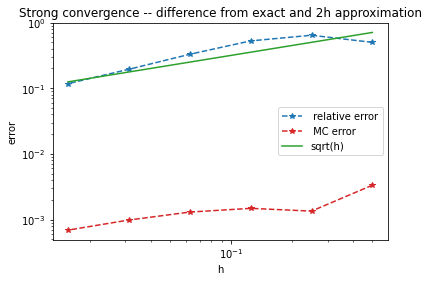

In [54]:
#parameters:
r   = 0.05; 
sig = 0.5; 
T   = 1; 
S0  = 100;
teta = 110
kappa = 2

#Monte Carlo simulation comparing to 2h simulation

M = 10**5 #total number of Monte Carlo paths
M2 = 10**4 #number of paths at a time
hh = []
err1 = []
err2 = []
err3 = []
err4 = []

# running the code for different values of h
for p in range(1,7):
    N = 2**p
    h = T/N
    
    sum1 = 0
    sum2 = 0
    sum3 = 0
    sum4 = 0
    
    m = 1
    while m<=M:
        m2 = min(M2,M-m+1)
        m2 = int(m2)
        S = S0*np.ones((1, m2)) #inintial value for all the paths
        S2 = S0*np.ones((1, m2)) #inintial value for all the paths
        W = 0
        
        # repeatedly we move by dW steps taken from normal distribution
        for n in range(1,int(N/2)+1):
            dW1 = math.sqrt(h)*np.random.randn(1,m2)
            S  = S + kappa*h*(teta - S)+sig*dW1  
            dW2 = math.sqrt(h)*np.random.randn(1,m2)
            S  = S + kappa*h*(teta - S)+sig*dW2  
            
            #moving by two steps at the time
            S2 = S + kappa*2*h*(teta - S)+sig*(dW1+dW2)  

            W = W + dW1 + dW2

        #calculating residuals between the paths with step h and paths with step 2h    
        delta  = np.multiply((S2-S),(S2-S))
        sum3 = sum3 + np.sum(delta)
        sum4 = sum4 + np.sum(np.multiply(delta,delta)) #difference to power 4 needed for standard dev calculations
        
        m = m + M2
    
    hh.append(h)

    #error calculation for the relative difference between h a d 2h timesteps
    Vd = sum3/M
    sd = math.sqrt((sum4/M - (sum3/M)**2)/(M-1))
    err3.append(math.sqrt(Vd)) #strong convergence error (due to length of timestep)
    err4.append((0.5/math.sqrt(Vd)) * 3*sd) #error from MC simulation due to # of paths within 3 st dev

#plotting    
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.loglog(hh,np.absolute(err3), color = 'tab:blue', linestyle = '--', marker = '*')
ax.loglog(hh,err4, color = 'tab:red', linestyle = '--', marker = '*')

#plotting square root of h to compare the slope with the relative error and show the same rate of convergence
#square root was chosen due to the theretical result by Kloeden & Platen 1992
ax.loglog(hh,np.sqrt(np.asarray(hh)), color = 'tab:green')

ax.legend([' relative error',' MC error','sqrt(h)'])
ax.set_xlabel('h')
ax.set_ylabel('error')
ax.set_title('Strong convergence -- difference from exact and 2h approximation')
plt.show()